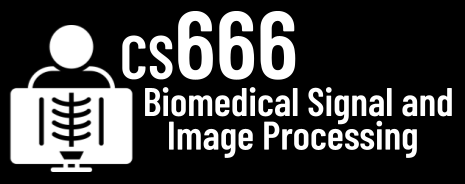

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.8 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [7]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [9]:
num_samples = signal.shape[0]


In [10]:
num_samples

15000

In [11]:
SAMPLING_RATE = 1000
SECONDS = num_samples / SAMPLING_RATE

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [12]:
### TODO
from biosppy.signals import ecg
import matplotlib.pyplot as plt


# Process the ECG signal
ecgOut = ecg.ecg(signal=signal, sampling_rate=1000., show=False)

# Extract the QRS complex locations
qrs_locs = ecgOut['rpeaks']

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

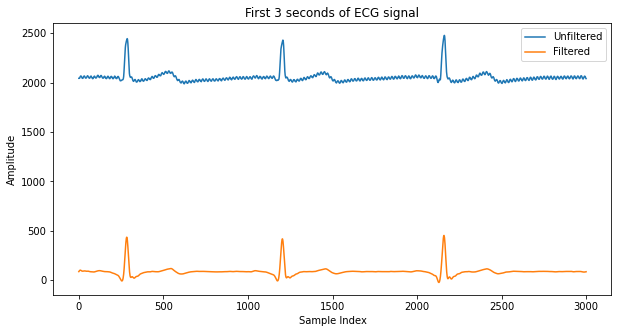

In [13]:
num_samples = int(3 * metadata['sampling_rate'])

# Plot the first 3 seconds of the unfiltered and filtered signals
plt.figure(figsize=(10, 5))
plt.plot(signal[:num_samples], label='Unfiltered')
plt.plot(ecgOut['filtered'][:num_samples], label='Filtered')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('First 3 seconds of ECG signal')
plt.legend()
plt.show()

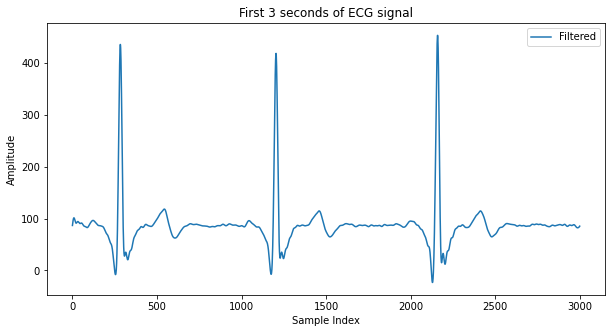

In [14]:
### TODO plot filtered signal

plt.figure(figsize=(10, 5))
plt.plot(ecgOut['filtered'][:num_samples], label='Filtered')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('First 3 seconds of ECG signal')
plt.legend()
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

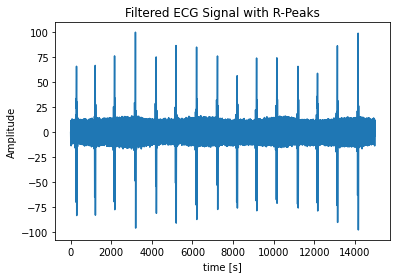

In [15]:
### TODO
import numpy as np
import scipy.signal

def detect_rpeaks(filtered_data):
    # First differentiate the filtered ECG signal
    differentiated_signal = np.diff(filtered_data)

    # Squaring the differentiated signal
    squared_signal = differentiated_signal**2

    # Apply a moving average filter to the squared signal with a window length of 150 samples
    window = np.ones(150) / 150
    smoothed_signal = np.convolve(squared_signal, window, mode='valid')

    # Find the local maxima of the smoothed signal
    rpeaks = []
    for i in range(1, len(smoothed_signal) - 1):
        if smoothed_signal[i] > smoothed_signal[i-1] and smoothed_signal[i] > smoothed_signal[i+1]:
            rpeaks.append(i)

    return rpeaks

# Filter the ECG signal using a Butterworth filter
b, a = scipy.signal.butter(3, 0.05, 'highpass')

filtered_data = scipy.signal.filtfilt(b, a, signal)

# Detect the R-peaks
rpeaks = detect_rpeaks(filtered_data)

# Plot the filtered ECG signal
plt.plot(filtered_data)

# Label the x-axis as 'time [s]'
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.title("Filtered ECG Signal with R-Peaks")
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [16]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.3 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


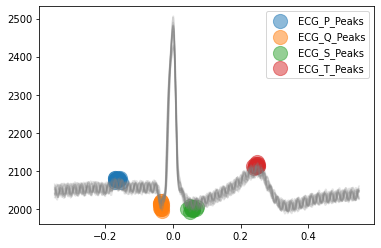

In [17]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
import numpy as np
import neurokit2 as nk

# Clean the ECG signal
ecg_cleaned = nk.ecg_clean(signal, sampling_rate=SAMPLING_RATE)

# Detect R-peaks in the ECG signal
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)

# Detect P, Q, S, and T peaks using the neurokit.ecg_delineate function
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

# plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signal)

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')


In [18]:
# TODO Does the detection work well?
# -- Yes

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

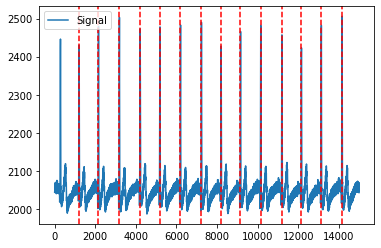

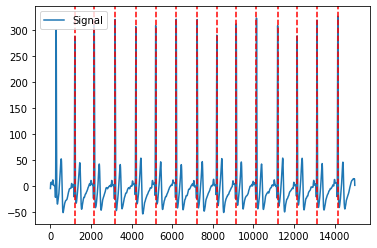

In [19]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Clean the ECG signal
ecg_cleaned = nk.ecg_clean(signal, sampling_rate=SAMPLING_RATE)

# Detect R-peaks in the ECG signal
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)

# Detect P, Q, S, and T peaks in the unfiltered signal
_, unfiltered_waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

# Detect R-peaks in the cleaned ECG signal
_, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)

# Detect P, Q, S, and T peaks in the filtered signal
_, filtered_waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=1000, method="peak")
# Plot the unfiltered ECG signal with P, Q, S, and T peaks
unfiltered_ecg = nk.events_plot(rpeaks['ECG_R_Peaks'], signal)

# Plot the filtered ECG signal with P, Q, S, and T peaks
filtered_ecg = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_cleaned)



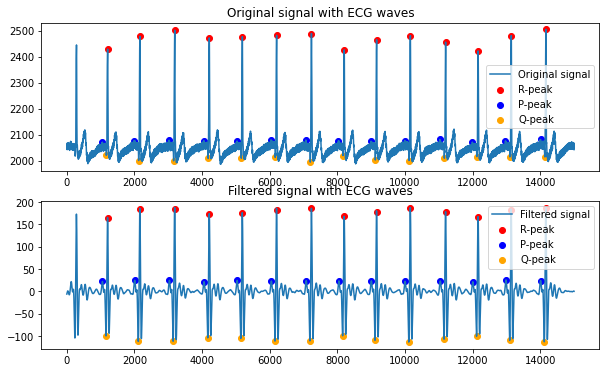

In [20]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
ecg_cleaned = nk.ecg_clean(signal, sampling_rate=SAMPLING_RATE)

# Detect R-peaks in the ECG signal
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=SAMPLING_RATE)

# Detect P Q S T peaks in the original signal
_, waves_peak_original = nk.ecg_delineate(signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

# Filter the ECG signal
lowcut = 5
highcut = 15
filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=lowcut, highcut=highcut, method='butterworth', order=3)

# Detect P Q S T peaks in the filtered signal
_, waves_peak_filtered = nk.ecg_delineate(filtered_signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")
rpeaks = np.array(rpeaks['ECG_R_Peaks'])

# Plot the original and filtered signals
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(signal, label='Original signal')
axs[0].scatter(rpeaks.astype(int), signal[rpeaks.astype(int)], color='red', label='R-peak')
axs[0].scatter(waves_peak_original["ECG_P_Peaks"], signal[waves_peak_original["ECG_P_Peaks"]], color='blue', label='P-peak')
axs[0].scatter(waves_peak_original["ECG_Q_Peaks"], signal[waves_peak_original["ECG_Q_Peaks"]], color='orange', label='Q-peak')
axs[0].legend()
axs[0].set_title("Original signal with ECG waves")

axs[1].plot(filtered_signal, label='Filtered signal')
axs[1].scatter(rpeaks.astype(int), filtered_signal[rpeaks.astype(int)], color='red', label='R-peak')
axs[1].scatter(waves_peak_filtered["ECG_P_Peaks"], filtered_signal[waves_peak_filtered["ECG_P_Peaks"]], color='blue', label='P-peak')
axs[1].scatter(waves_peak_filtered["ECG_Q_Peaks"], filtered_signal[waves_peak_filtered["ECG_Q_Peaks"]], color='orange', label='Q-peak')
axs[1].legend()
axs[1].set_title("Filtered signal with ECG waves")
plt.show()

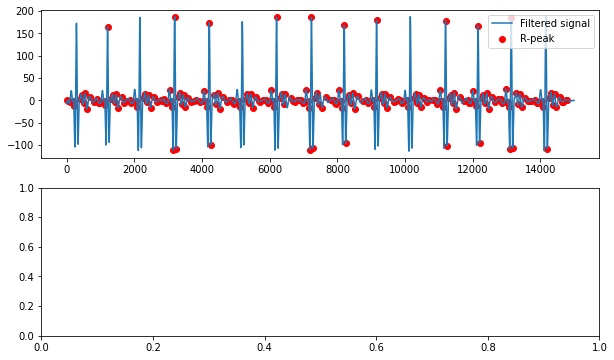

In [39]:
# Finally, run the delineation on the filtered signal from BioSPPY.
import biosppy
# First, extract R-peaks using the same method as before
rpeaks = detect_rpeaks(filtered_signal)

# Then, perform the delineation on the filtered signal
waves_peak_filtered = biosppy.signals.ecg.christov_segmenter(signal=filtered_signal, sampling_rate=SAMPLING_RATE)
# Plot the filtered signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(filtered_signal, label='Filtered signal')
axs[0].scatter(rpeaks, filtered_signal[rpeaks], color='red', label='R-peak')
axs[0].legend()




In [30]:
# TODO Which one works the best?
# Both methods have their strengths and limitations and the choice of which one to use depends on the specific requirements of the task at hand. For example, the filtered signal 
# from BioSPPY may be more robust to noise, but it may also introduce artifacts that affect the accuracy of the ECG delineation. On the other hand, the original signal may be more susceptible to noise, 
# but it may also preserve more of the original ECG waveform, which could lead to more accurate ECG delineation results.


0.0


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#